# Отчет по заданию 1
<strong>Методы оптимизации</strong>

Подгрузим все библиотеки

In [1]:
import numpy as np
import scipy as sp

In [2]:
from optimization import *

In [3]:
from oracles import *
from plot_trajectory_2d import *

Рассмотрим два квадартичных оракула: один симметричный относительно осей, другой - сплюснутый. Запустим градиентный спуск на обоих оракулах.

In [85]:
A1 = np.array([[1, 0], [0, 1]])
A2 = np.array([[1, 0], [0, 70]])
b = np.array([0, 0])

In [86]:
oracle1 = QuadraticOracle(A1, b)
oracle2 = QuadraticOracle(A2, b)

Text(0, 0.5, 'x2')

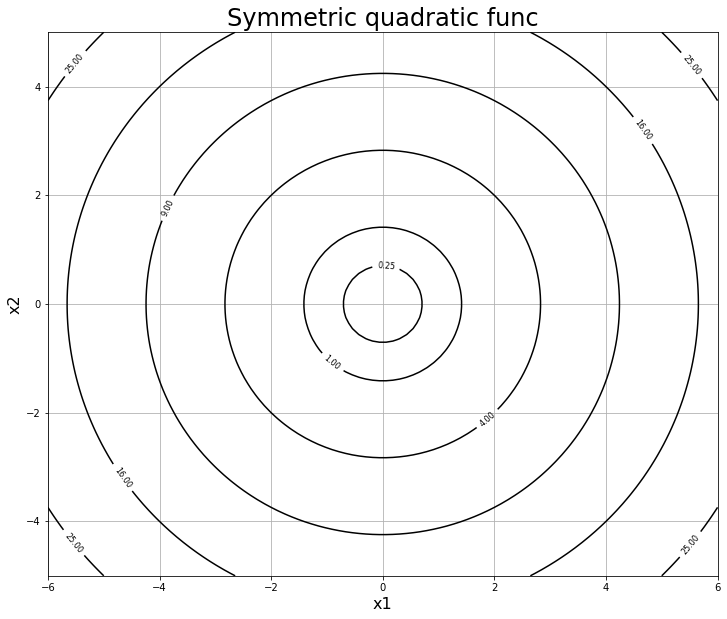

In [93]:
plt.figure(figsize=(12, 10))
plot_levels(oracle1.func)
plt.title('Symmetric quadratic func', fontsize=24)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)

Text(0, 0.5, 'x2')

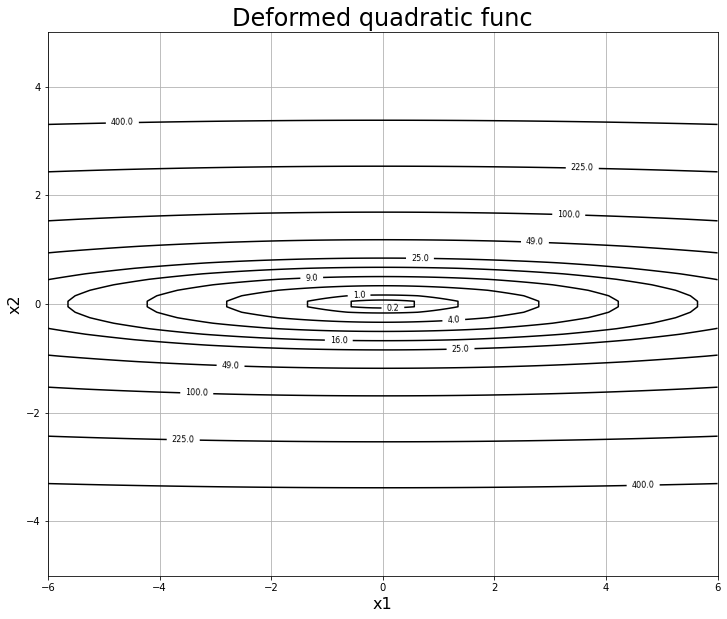

In [97]:
plt.figure(figsize=(12, 10))
plot_levels(oracle2.func, levels=[0, 0.25, 1, 4, 9, 16, 25, 49, 100, 225, 400])
plt.title('Deformed quadratic func', fontsize=24)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)

In [15]:
tool = get_line_search_tool(line_search_options={'method': 'Wolfe'})

In [83]:
x_res, msg, history = gradient_descent(oracle1, np.array([60, 10]), line_search_options={'method': 'Armijo', 'c1': 1e-4}, trace=True)

Text(0, 0.5, 'x2')

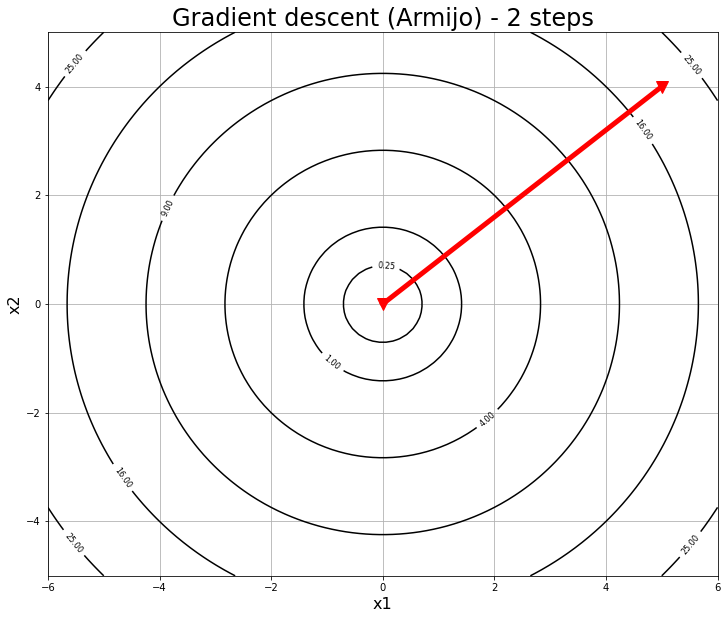

In [113]:
x_res, msg, history = gradient_descent(oracle1, np.array([5, 4]), line_search_options={'method': 'Armijo'}, trace=True)
plt.figure(figsize=(12, 10))
plot_levels(oracle1.func)
plot_trajectory(oracle1.func, history['x'])
plt.title('Gradient descent (Armijo) - {} steps'.format(len(history['x'])), fontsize=24)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)

Text(0, 0.5, 'x2')

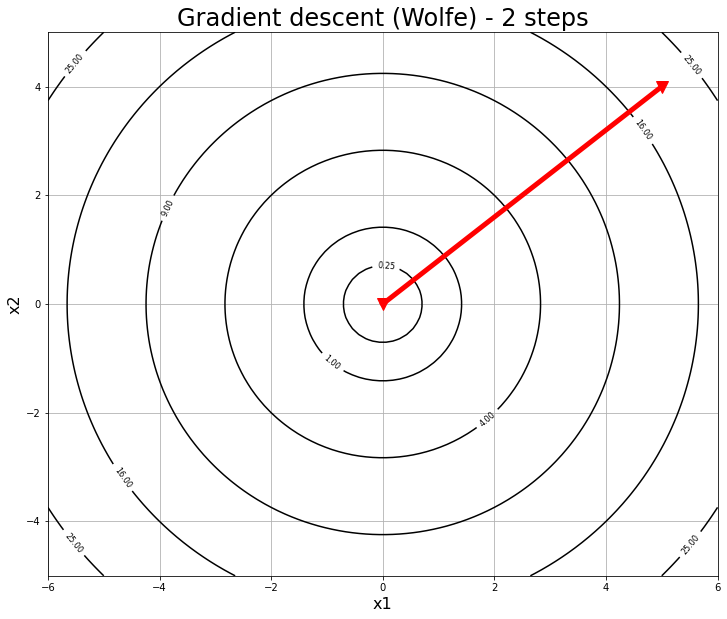

In [112]:
x_res, msg, history = gradient_descent(oracle1, np.array([5, 4]), line_search_options={'method': 'Wolfe'}, trace=True)
plt.figure(figsize=(12, 10))
plot_levels(oracle1.func)
plot_trajectory(oracle1.func, history['x'])
plt.title('Gradient descent (Wolfe) - {} steps'.format(len(history['x'])), fontsize=24)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)

Text(0, 0.5, 'x2')

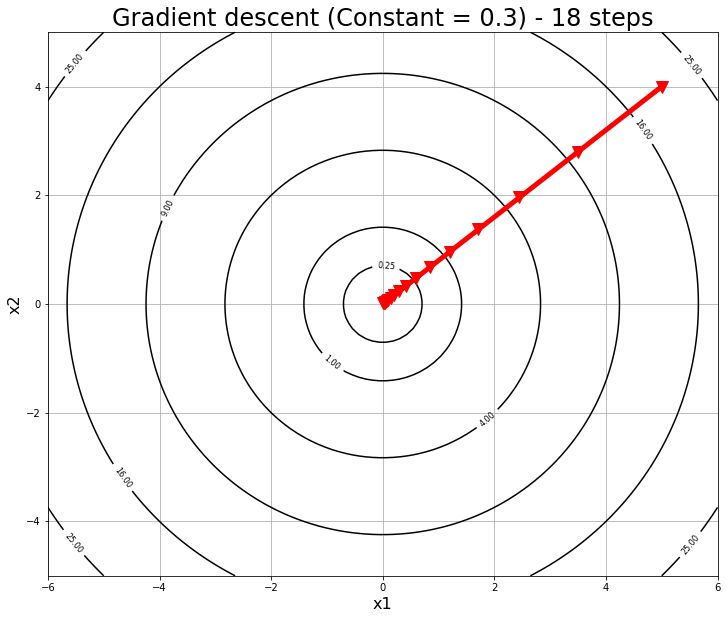

In [111]:
x_res, msg, history = gradient_descent(oracle1, np.array([5, 4]), line_search_options={'method': 'Constant', 'c': 0.3}, trace=True)
plt.figure(figsize=(12, 10))
plot_levels(oracle1.func)
plot_trajectory(oracle1.func, history['x'])
plt.title('Gradient descent (Constant = 0.3) - {} steps'.format(len(history['x'])), fontsize=24)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)

Text(0, 0.5, 'x2')

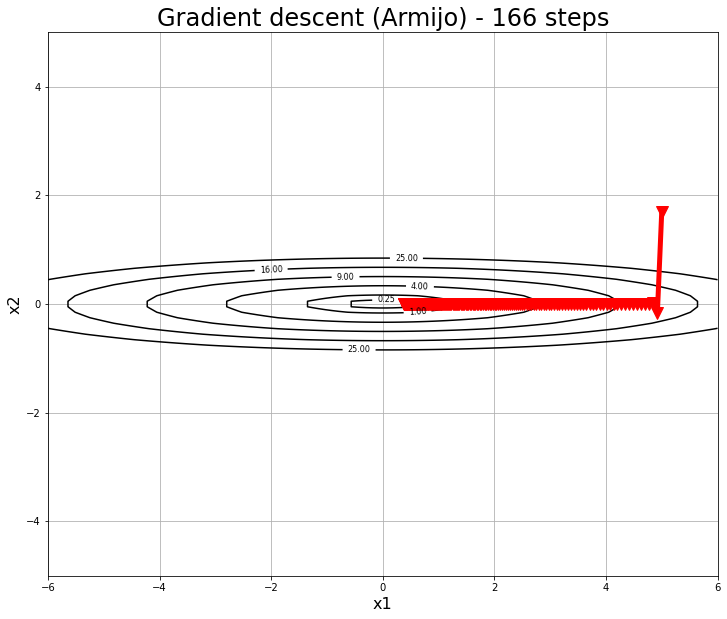

In [116]:
x_res, msg, history = gradient_descent(oracle2, np.array([5, 1.7]), line_search_options={'method': 'Armijo'}, trace=True)
plt.figure(figsize=(12, 10))
plot_levels(oracle2.func)
plot_trajectory(oracle2.func, history['x'])
plt.title('Gradient descent (Armijo) - {} steps'.format(len(history['x'])), fontsize=24)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)

Text(0, 0.5, 'x2')

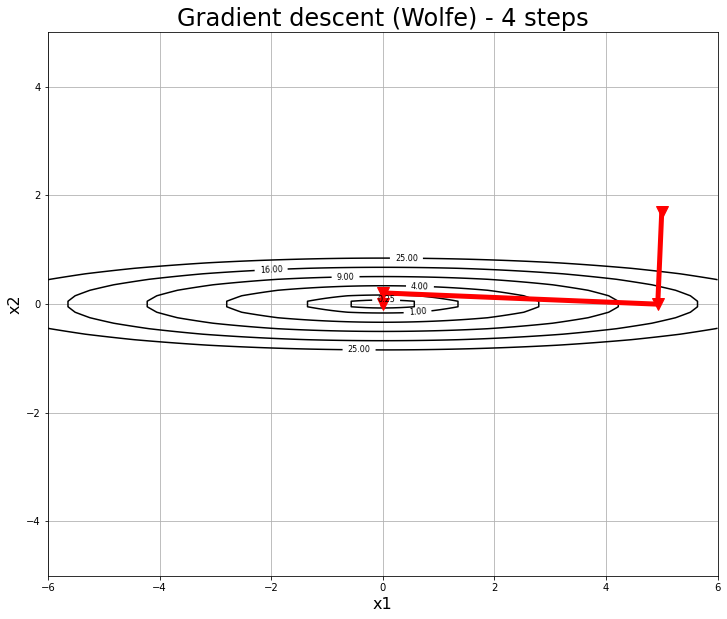

In [119]:
x_res, msg, history = gradient_descent(oracle2, np.array([5, 1.7]), line_search_options={'method': 'Wolfe'}, trace=True)
plt.figure(figsize=(12, 10))
plot_levels(oracle2.func)
plot_trajectory(oracle2.func, history['x'])
plt.title('Gradient descent (Wolfe) - {} steps'.format(len(history['x'])), fontsize=24)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)

Text(0, 0.5, 'x2')

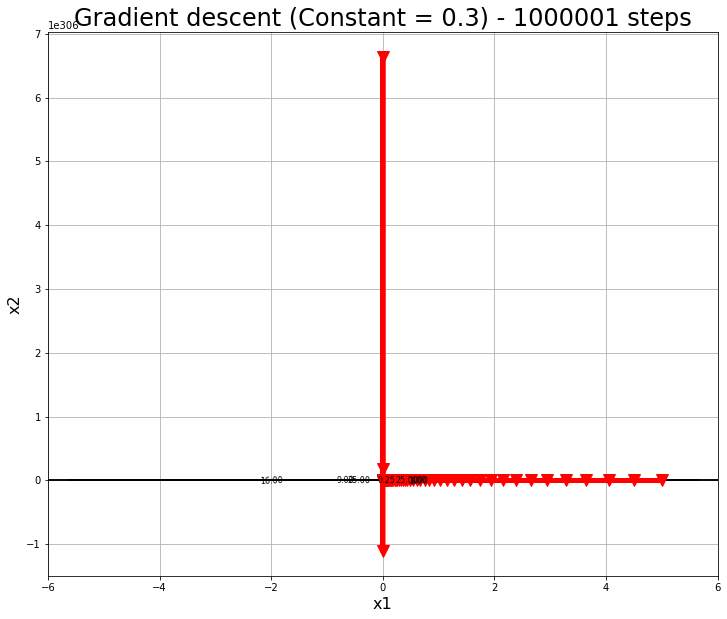

In [213]:
x_res, msg, history = gradient_descent(oracle2, np.array([5, 1.7]), line_search_options={'method': 'Constant', 'c': 0.1}, trace=True, max_iter=1000000)
plt.figure(figsize=(12, 10))
plot_levels(oracle2.func)
plot_trajectory(oracle2.func, history['x'])
plt.title('Gradient descent (Constant = 0.3) - {} steps'.format(len(history['x'])), fontsize=24)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)

In [212]:
msg

'iterations_exceeded'

# Константый метод не сходится

# 3.2

In [150]:
def get_diag_values(n, k):
    arr = np.random.uniform(size=n)
    arr  = arr - np.min(arr)
    arr = arr * (k - 1) / np.max(arr)
    return np.round(arr + 1)

In [159]:
def get_matrix(n, k):
    diags = get_diag_values(n, k)
    return sp.sparse.diags(diags)

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


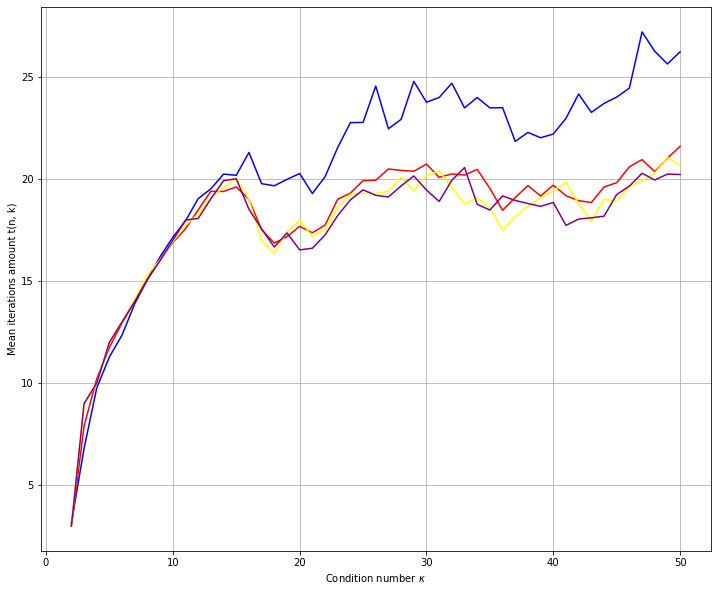

In [245]:
ns = [10, 100, 1000, 10000]
ks = np.linspace(2, 50, 49)
plt.figure(figsize=(12, 10))
plt.grid()
plt.xlabel('Condition number $\kappa$')
plt.ylabel('Mean iterations amount t(n, k)')
res = []
for n, clr in zip(ns, ['blue', 'red', 'yellow', 'purple']):
    ts = lambda k: t(n, k)
    t_res = np.array([np.vectorize(ts)(ks) for i in range(100)])
    res.append(t_res)
    plt.plot(ks, np.mean(t_res, axis=0), color=clr, alpha=1)
    


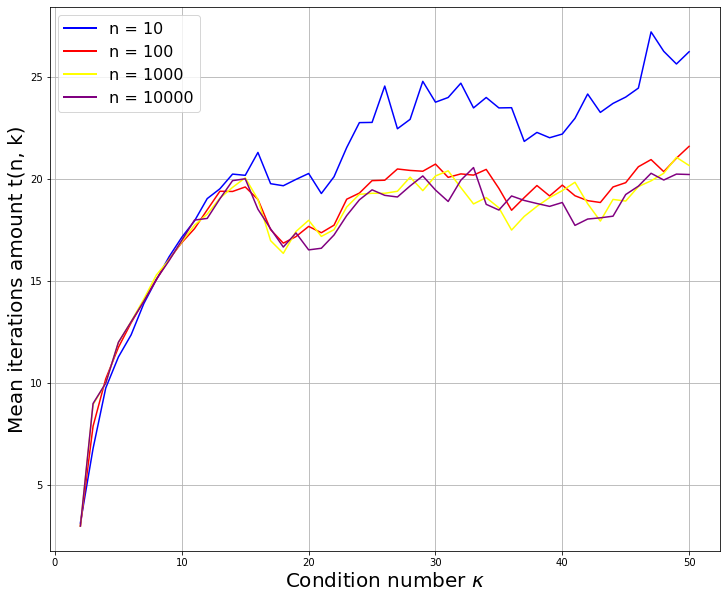

In [246]:
from matplotlib.lines import Line2D


custom_lines = []
labels = []
ns = [10, 100, 1000, 10000]
ks = np.linspace(2, 50, 49)
plt.figure(figsize=(12, 10))
plt.grid()
plt.xlabel('Condition number $\kappa$', fontsize=20)
plt.ylabel('Mean iterations amount t(n, k)', fontsize=20)
for n, clr, i in zip(ns, ['blue', 'red', 'yellow', 'purple'], range(4)):
    ts = lambda k: t(n, k)
    t_res = res[i]
    plt.plot(ks, np.mean(t_res, axis=0), color=clr, alpha=1)
    custom_lines.append(Line2D([0], [0], color=clr, lw=2))
    labels.append('n = {}'.format(n))
    plt.legend(custom_lines, labels, fontsize=16)


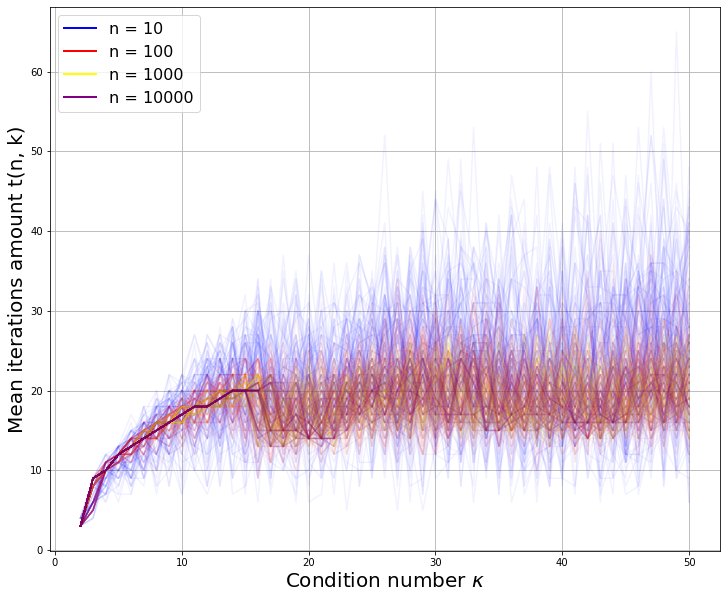

In [260]:
from matplotlib.lines import Line2D


custom_lines = []
labels = []
ns = [10, 100, 1000, 10000]
ks = np.linspace(2, 50, 49)
plt.figure(figsize=(12, 10))
plt.grid()
plt.xlabel('Condition number $\kappa$', fontsize=20)
plt.ylabel('Mean iterations amount t(n, k)', fontsize=20)
for n, clr, i in zip(ns, ['blue', 'red', 'yellow', 'purple'], range(4)):
    ts = lambda k: t(n, k)
    t_res = res[i]
    for j in range(t_res.shape[0]):
        plt.plot(ks, t_res[j], color=clr, alpha=0.05)
    custom_lines.append(Line2D([0], [0], color=clr, lw=2))
    labels.append('n = {}'.format(n))
    plt.legend(custom_lines, labels, fontsize=16)

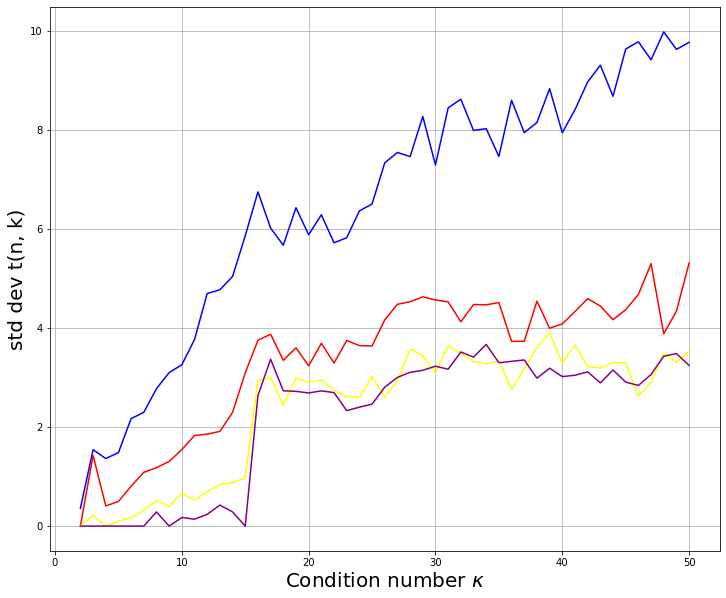

In [259]:
plt.figure(figsize=(12, 10))
plt.grid()
plt.xlabel('Condition number $\kappa$', fontsize=20)
plt.ylabel('std dev t(n, k)', fontsize=20)
# plt.vlines(15, ymin=-1, ymax=10, color='g', lw=4)
for n, clr, i in zip(ns, ['blue', 'red', 'yellow', 'purple'], range(4)):
    t_res = res[i]
    plt.plot(ks, np.std(t_res, axis=0), color=clr)

In [228]:
import pandas as pd

In [240]:
len(res)

4

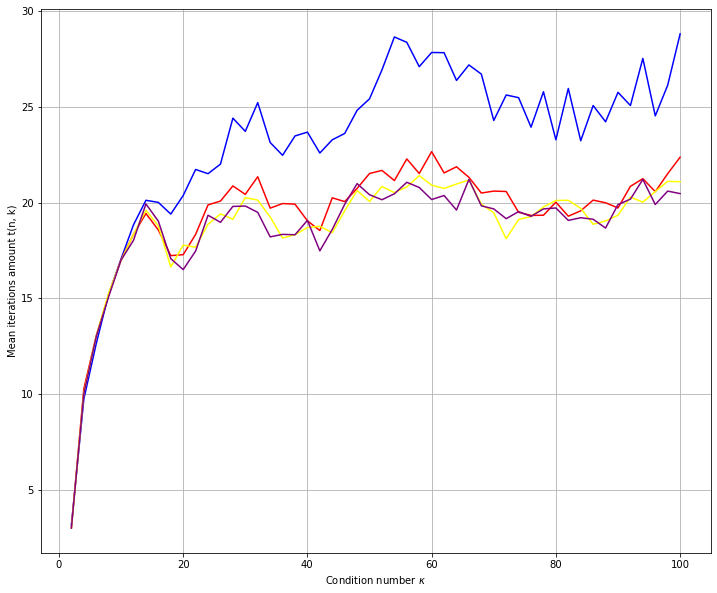

In [220]:
plt.figure(figsize=(12, 10))
plt.grid()
plt.xlabel('Condition number $\kappa$')
plt.ylabel('Mean iterations amount t(n, k)')
for n, clr, i in zip(ns, ['blue', 'red', 'yellow', 'purple'], range(4)):
    ts = lambda k: t(n, k)
    t_res = res[i]
    res.append(t_res)
    
    plt.plot(ks, np.mean(t_res, axis=0), color=clr, alpha=1)

In [216]:
def t(n, k):
    A = get_matrix(n, k)
    b = np.random.randint(-k, k, size=n)
    x_0 = np.random.randint(-2 * k, 2 * k, size=n)
    oracle = QuadraticOracle(A, b)
    x_res, msg, history = gradient_descent(oracle, x_0, line_search_options={'method': 'Wolfe'}, trace=True)
    assert msg == 'success'
    return len(history['func'])

In [205]:
t(1000, 25)

19

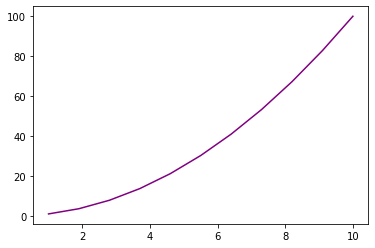

In [208]:
plt.plot(np.linspace(1, 10, 11), np.linspace(1, 10, 11) ** 2, color='purple')

In [177]:
np.random.seed(42)

In [176]:
str(10)

'10'

# 3.3

In [4]:
from sklearn.datasets import load_svmlight_file

## w8a

In [5]:
w8a_train = load_svmlight_file(open('data/w8a', 'rb'))
w8a_test = load_svmlight_file(open('data/w8a.t', 'rb'))

In [6]:
w8a_train[0].shape

(49749, 300)

In [7]:
w8a_oracle = create_log_reg_oracle(w8a_train[0], w8a_train[1], 1. / w8a_train[0].shape[0])

In [15]:
x_res_GD, msg_GD, history_GD = gradient_descent(w8a_oracle, np.zeros(w8a_train[0].shape[1]), line_search_options={'method': 'Wolfe'}, trace=True, display=True)

Gradient descent
Iteration 0 ended
Iteration 1 ended
Iteration 2 ended
Iteration 3 ended
Iteration 4 ended
Iteration 5 ended
Iteration 6 ended
Iteration 7 ended
Iteration 8 ended
Iteration 9 ended
Iteration 10 ended
Iteration 11 ended
Iteration 12 ended
Iteration 13 ended
Iteration 14 ended
Iteration 15 ended
Iteration 16 ended
Iteration 17 ended
Iteration 18 ended
Iteration 19 ended
Iteration 20 ended
Iteration 21 ended
Iteration 22 ended
Iteration 23 ended
Iteration 24 ended
Iteration 25 ended
Iteration 26 ended
Iteration 27 ended
Iteration 28 ended
Iteration 29 ended
Iteration 30 ended
Iteration 31 ended
Iteration 32 ended
Iteration 33 ended
Iteration 34 ended


In [16]:
x_res_NW, msg_NW, history_NW = newton(w8a_oracle, np.zeros(w8a_train[0].shape[1]), line_search_options={'method': 'Wolfe'}, trace=True, display=True)

Newton method
Iteration 0 ended
Iteration 1 ended
Iteration 2 ended
Iteration 3 ended
Iteration 4 ended
Iteration 5 ended


Text(0.5, 1.0, 'w8a dataset')

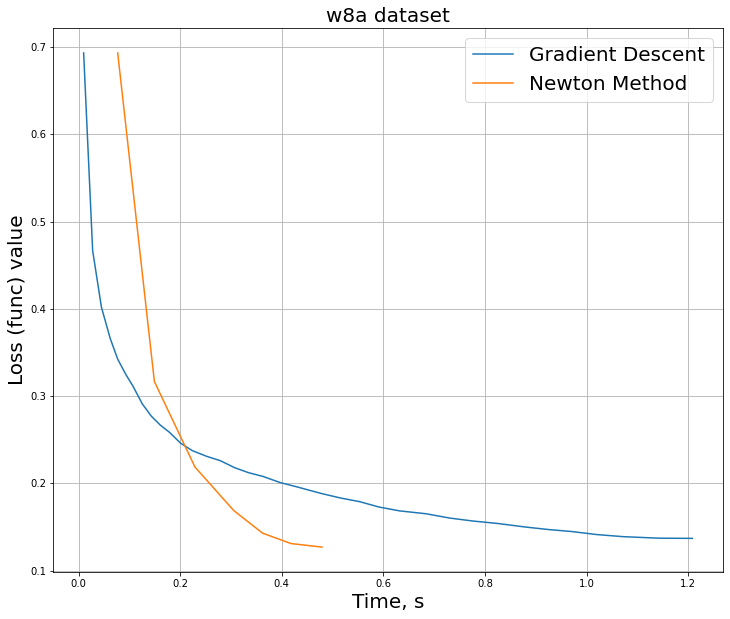

In [17]:
plt.figure(figsize=(12, 10))
plt.plot(history_GD['time'], history_GD['func'], label='Gradient Descent')
plt.plot(history_NW['time'], history_NW['func'], label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Time, s', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('w8a dataset', fontsize=20)

Text(0.5, 1.0, 'w8a dataset')

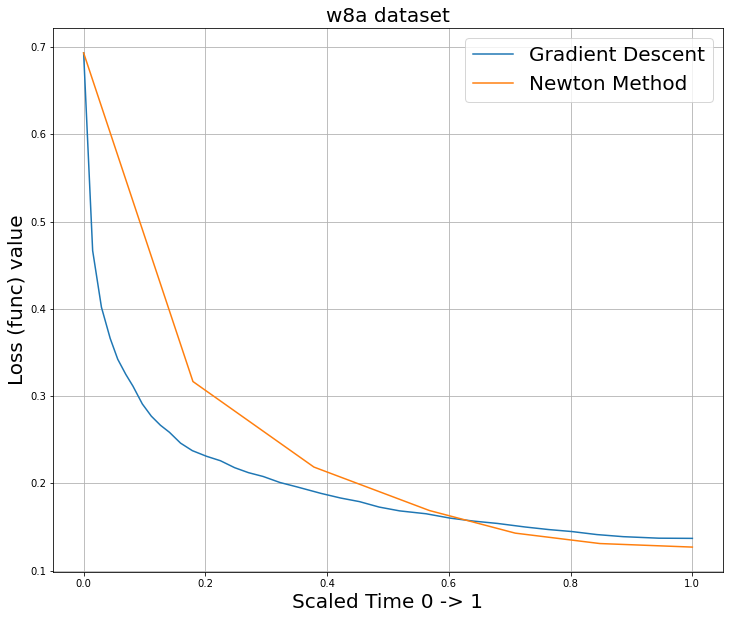

In [18]:
plt.figure(figsize=(12, 10))
def scale(time):
    time = time - np.min(time)
    time = time / np.max(time)
    return time
plt.plot(scale(np.copy(history_GD['time'])), history_GD['func'], label='Gradient Descent')
plt.plot(scale(np.copy(history_NW['time'])), history_NW['func'], label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Scaled Time 0 -> 1', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('w8a dataset', fontsize=20)

Text(0.5, 1.0, 'w8a dataset')

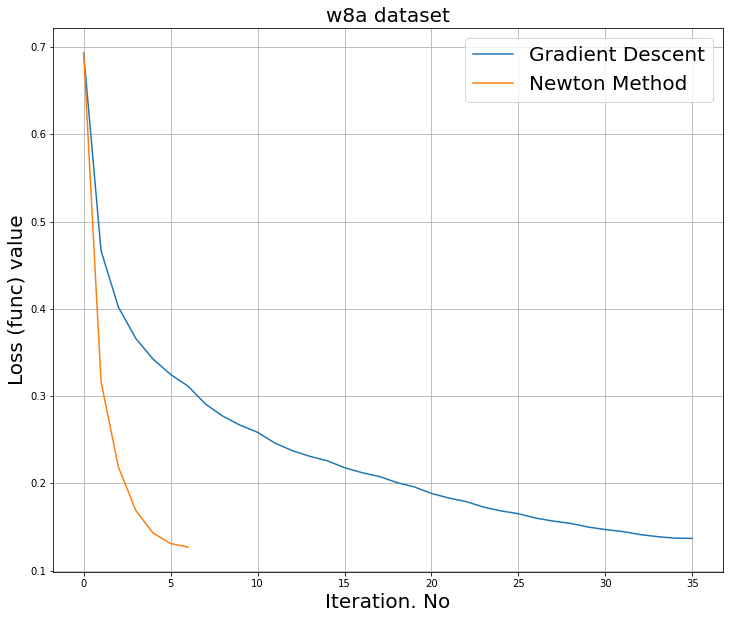

In [19]:
plt.figure(figsize=(12, 10))
def scale(time):
    time = time - np.min(time)
    time = time / np.max(time)
    return time
plt.plot(history_GD['func'], label='Gradient Descent')
plt.plot(history_NW['func'], label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Iteration. No', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('w8a dataset', fontsize=20)

In [20]:
len(history_GD['time']), len(history_NW['time'])

(36, 7)

In [21]:
history_NW['time'][-1] / history_GD['time'][-1]

0.3964851185254579

In [22]:
scaled_grad = lambda grad: np.array(grad) ** 2 / (np.linalg.norm(w8a_oracle.grad(np.zeros(w8a_train[0].shape[1]))) ** 2)

Text(0.5, 1.0, 'w8a dataset')

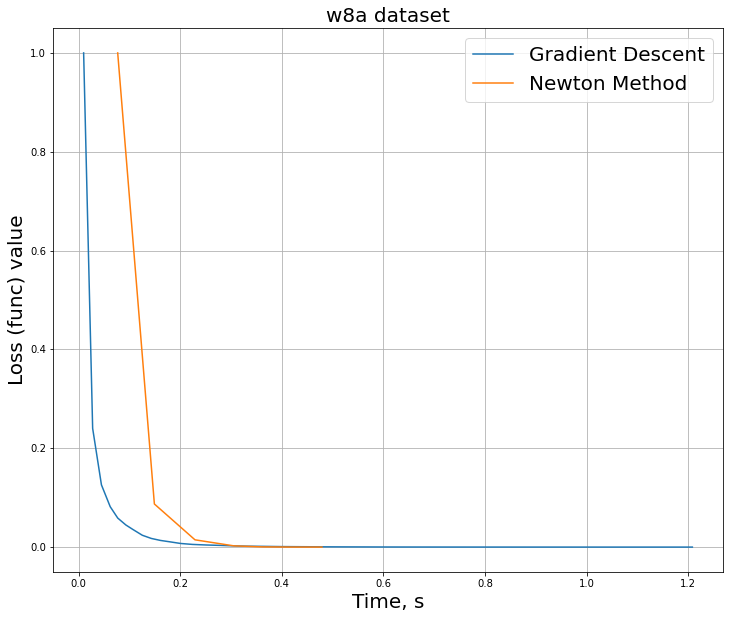

In [23]:
plt.figure(figsize=(12, 10))
plt.plot(history_GD['time'], scaled_grad(history_GD['grad_norm']), label='Gradient Descent')
plt.plot(history_NW['time'], scaled_grad(history_NW['grad_norm']), label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Time, s', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('w8a dataset', fontsize=20)

Text(0.5, 1.0, 'w8a dataset')

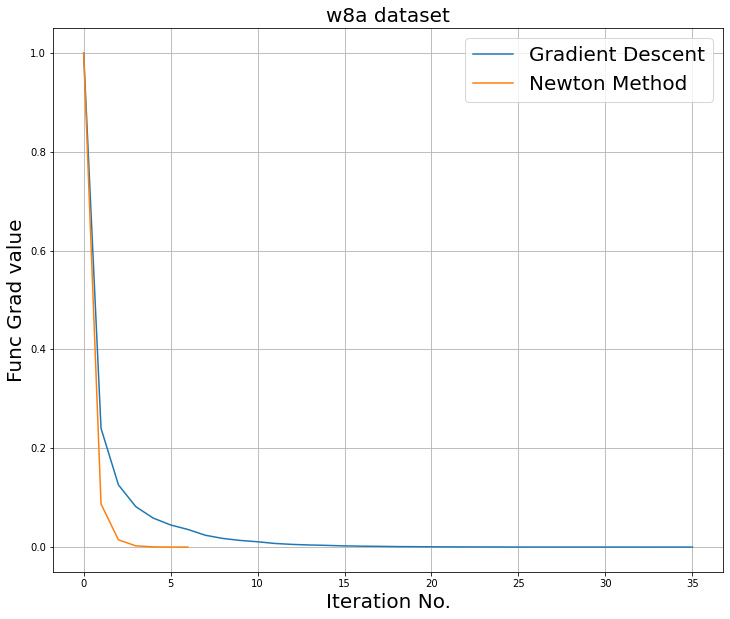

In [24]:
plt.figure(figsize=(12, 10))
def scale(time):
    time = time - np.min(time)
    time = time / np.max(time)
    return time
plt.plot(scaled_grad(history_GD['grad_norm']), label='Gradient Descent')
plt.plot(scaled_grad(history_NW['grad_norm']), label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Iteration No.', fontsize=20)
plt.ylabel('Func Grad value', fontsize=20)
plt.grid()
plt.title('w8a dataset', fontsize=20)

## gisette

In [34]:
w8a_train = load_svmlight_file(open('data/gisette_scale', 'rb'))
w8a_test = load_svmlight_file(open('data/gisette_scale.t', 'rb'))
data_name = 'gisette'

In [35]:
w8a_train[0].shape

(6000, 5000)

In [36]:
w8a_oracle = create_log_reg_oracle(w8a_train[0], w8a_train[1], 1. / w8a_train[0].shape[0])

In [37]:
x_res_GD, msg_GD, history_GD = gradient_descent(w8a_oracle, np.zeros(w8a_train[0].shape[1]), line_search_options={'method': 'Wolfe'}, trace=True, display=True)

Gradient descent
Iteration 0 ended
Iteration 1 ended
Iteration 2 ended
Iteration 3 ended
Iteration 4 ended
Iteration 5 ended
Iteration 6 ended
Iteration 7 ended
Iteration 8 ended
Iteration 9 ended
Iteration 10 ended
Iteration 11 ended
Iteration 12 ended
Iteration 13 ended
Iteration 14 ended
Iteration 15 ended
Iteration 16 ended
Iteration 17 ended
Iteration 18 ended
Iteration 19 ended
Iteration 20 ended
Iteration 21 ended
Iteration 22 ended
Iteration 23 ended
Iteration 24 ended
Iteration 25 ended
Iteration 26 ended
Iteration 27 ended
Iteration 28 ended
Iteration 29 ended
Iteration 30 ended
Iteration 31 ended
Iteration 32 ended
Iteration 33 ended
Iteration 34 ended
Iteration 35 ended
Iteration 36 ended
Iteration 37 ended
Iteration 38 ended
Iteration 39 ended
Iteration 40 ended
Iteration 41 ended
Iteration 42 ended
Iteration 43 ended
Iteration 44 ended
Iteration 45 ended
Iteration 46 ended
Iteration 47 ended
Iteration 48 ended
Iteration 49 ended
Iteration 50 ended
Iteration 51 ended
Itera

Iteration 415 ended
Iteration 416 ended
Iteration 417 ended
Iteration 418 ended
Iteration 419 ended
Iteration 420 ended
Iteration 421 ended
Iteration 422 ended
Iteration 423 ended
Iteration 424 ended
Iteration 425 ended
Iteration 426 ended
Iteration 427 ended
Iteration 428 ended
Iteration 429 ended
Iteration 430 ended
Iteration 431 ended
Iteration 432 ended
Iteration 433 ended
Iteration 434 ended
Iteration 435 ended
Iteration 436 ended
Iteration 437 ended
Iteration 438 ended
Iteration 439 ended
Iteration 440 ended
Iteration 441 ended
Iteration 442 ended
Iteration 443 ended
Iteration 444 ended
Iteration 445 ended
Iteration 446 ended
Iteration 447 ended
Iteration 448 ended
Iteration 449 ended
Iteration 450 ended
Iteration 451 ended
Iteration 452 ended
Iteration 453 ended
Iteration 454 ended
Iteration 455 ended
Iteration 456 ended
Iteration 457 ended
Iteration 458 ended
Iteration 459 ended
Iteration 460 ended
Iteration 461 ended
Iteration 462 ended
Iteration 463 ended
Iteration 464 ended


Iteration 825 ended
Iteration 826 ended
Iteration 827 ended
Iteration 828 ended
Iteration 829 ended
Iteration 830 ended
Iteration 831 ended
Iteration 832 ended
Iteration 833 ended
Iteration 834 ended
Iteration 835 ended
Iteration 836 ended
Iteration 837 ended
Iteration 838 ended
Iteration 839 ended
Iteration 840 ended
Iteration 841 ended
Iteration 842 ended
Iteration 843 ended
Iteration 844 ended
Iteration 845 ended
Iteration 846 ended
Iteration 847 ended
Iteration 848 ended
Iteration 849 ended
Iteration 850 ended
Iteration 851 ended
Iteration 852 ended
Iteration 853 ended
Iteration 854 ended
Iteration 855 ended
Iteration 856 ended
Iteration 857 ended
Iteration 858 ended
Iteration 859 ended
Iteration 860 ended
Iteration 861 ended
Iteration 862 ended
Iteration 863 ended
Iteration 864 ended
Iteration 865 ended
Iteration 866 ended
Iteration 867 ended
Iteration 868 ended
Iteration 869 ended
Iteration 870 ended
Iteration 871 ended
Iteration 872 ended
Iteration 873 ended
Iteration 874 ended


Iteration 1224 ended
Iteration 1225 ended
Iteration 1226 ended
Iteration 1227 ended
Iteration 1228 ended
Iteration 1229 ended
Iteration 1230 ended
Iteration 1231 ended
Iteration 1232 ended
Iteration 1233 ended
Iteration 1234 ended
Iteration 1235 ended
Iteration 1236 ended
Iteration 1237 ended
Iteration 1238 ended
Iteration 1239 ended
Iteration 1240 ended
Iteration 1241 ended
Iteration 1242 ended
Iteration 1243 ended
Iteration 1244 ended
Iteration 1245 ended
Iteration 1246 ended
Iteration 1247 ended
Iteration 1248 ended
Iteration 1249 ended
Iteration 1250 ended
Iteration 1251 ended
Iteration 1252 ended
Iteration 1253 ended
Iteration 1254 ended
Iteration 1255 ended
Iteration 1256 ended
Iteration 1257 ended
Iteration 1258 ended
Iteration 1259 ended
Iteration 1260 ended
Iteration 1261 ended
Iteration 1262 ended
Iteration 1263 ended
Iteration 1264 ended
Iteration 1265 ended
Iteration 1266 ended
Iteration 1267 ended
Iteration 1268 ended
Iteration 1269 ended
Iteration 1270 ended
Iteration 127

In [38]:
x_res_NW, msg_NW, history_NW = newton(w8a_oracle, np.zeros(w8a_train[0].shape[1]), line_search_options={'method': 'Wolfe'}, trace=True, display=True)

Newton method
Iteration 0 ended
Iteration 1 ended
Iteration 2 ended
Iteration 3 ended
Iteration 4 ended
Iteration 5 ended


In [39]:
len(history_GD['time'])

1598

Text(0.5, 1.0, 'gisette dataset')

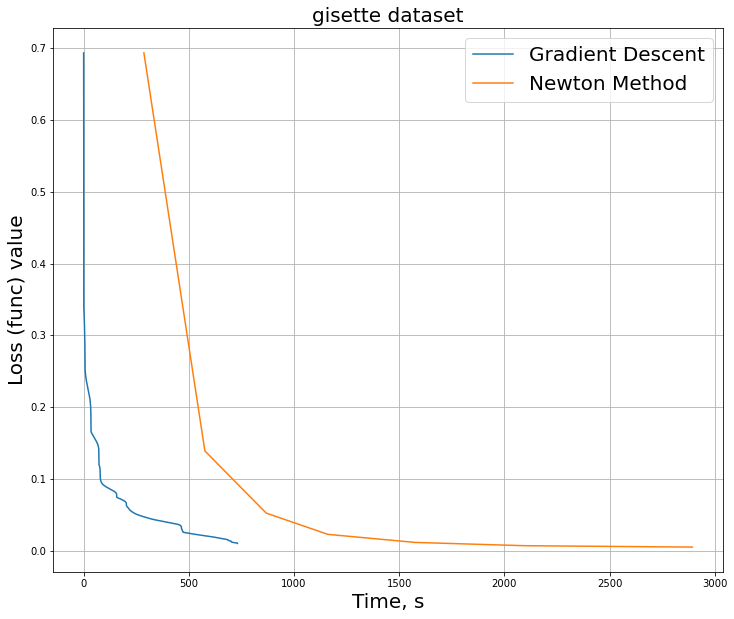

In [40]:
plt.figure(figsize=(12, 10))
plt.plot(history_GD['time'], history_GD['func'], label='Gradient Descent')
plt.plot(history_NW['time'], history_NW['func'], label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Time, s', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)

Text(0.5, 1.0, 'gisette dataset')

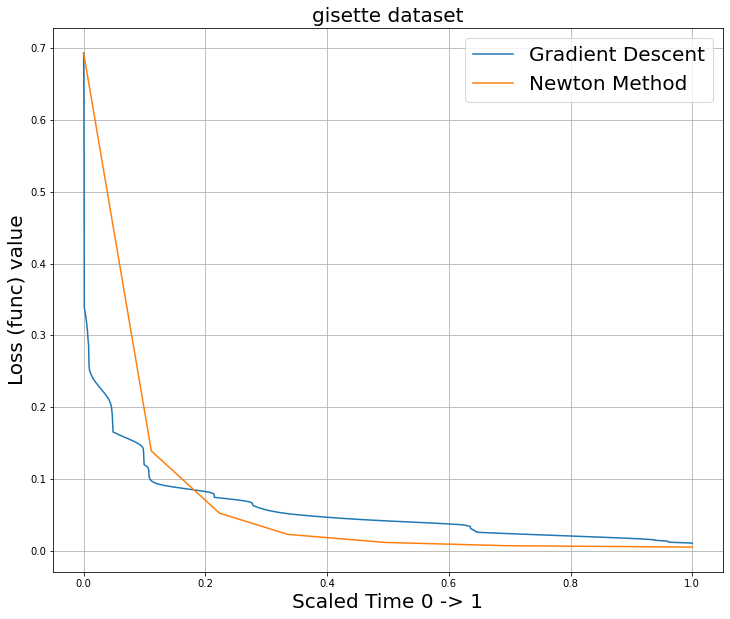

In [41]:
plt.figure(figsize=(12, 10))
def scale(time):
    time = time - np.min(time)
    time = time / np.max(time)
    return time
plt.plot(scale(np.copy(history_GD['time'])), history_GD['func'], label='Gradient Descent')
plt.plot(scale(np.copy(history_NW['time'])), history_NW['func'], label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Scaled Time 0 -> 1', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)

Text(0.5, 1.0, 'gisette dataset')

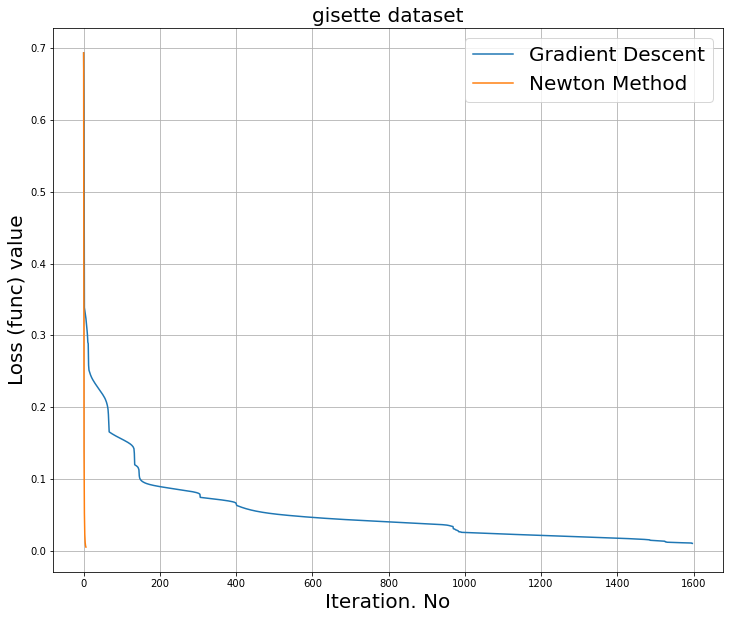

In [42]:
plt.figure(figsize=(12, 10))
def scale(time):
    time = time - np.min(time)
    time = time / np.max(time)
    return time
plt.plot(history_GD['func'], label='Gradient Descent')
plt.plot(history_NW['func'], label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Iteration. No', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)

In [43]:
len(history_GD['time']), len(history_NW['time'])

(1598, 7)

In [44]:
history_NW['time'][-1] / history_GD['time'][-1]

3.9556003079584388

In [45]:
scaled_grad = lambda grad: np.array(grad) ** 2 / (np.linalg.norm(w8a_oracle.grad(np.zeros(w8a_train[0].shape[1]))) ** 2)

Text(0.5, 1.0, 'gisette dataset')

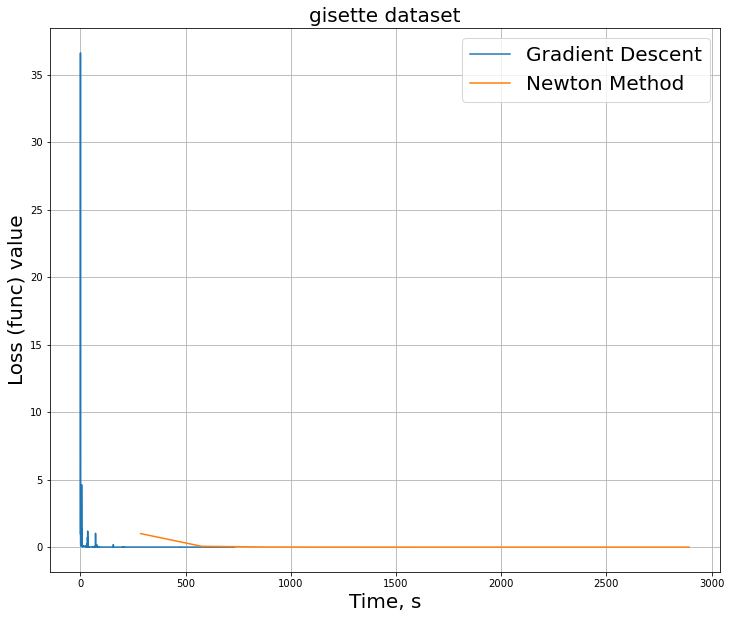

In [46]:
plt.figure(figsize=(12, 10))
plt.plot(history_GD['time'], scaled_grad(history_GD['grad_norm']), label='Gradient Descent')
plt.plot(history_NW['time'], scaled_grad(history_NW['grad_norm']), label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Time, s', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)

Text(0.5, 1.0, 'gisette dataset')

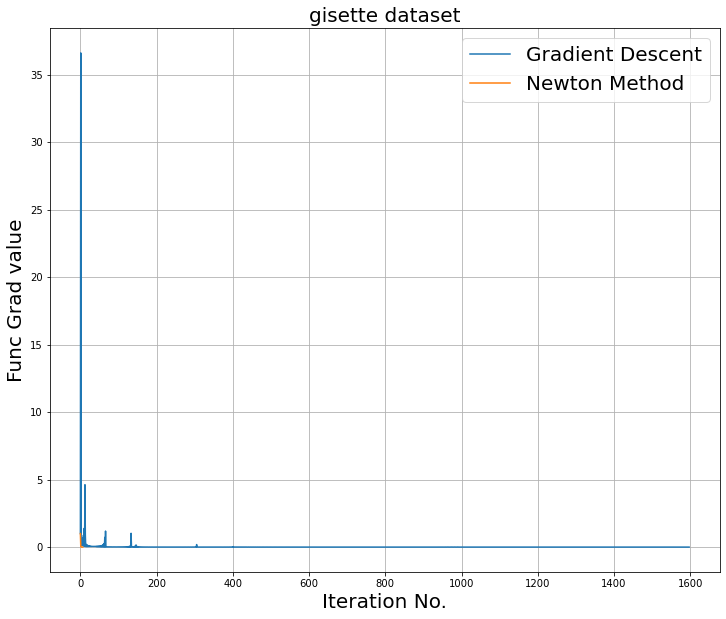

In [47]:
plt.figure(figsize=(12, 10))
def scale(time):
    time = time - np.min(time)
    time = time / np.max(time)
    return time
plt.plot(scaled_grad(history_GD['grad_norm']), label='Gradient Descent')
plt.plot(scaled_grad(history_NW['grad_norm']), label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Iteration No.', fontsize=20)
plt.ylabel('Func Grad value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)

## gisette

In [48]:
w8a_train = load_svmlight_file(open('data/real-sim', 'rb'))
data_name = 'real_sim'

In [49]:
w8a_train[0].shape

(72309, 20958)

In [50]:
w8a_oracle = create_log_reg_oracle(w8a_train[0], w8a_train[1], 1. / w8a_train[0].shape[0])

In [51]:
x_res_GD, msg_GD, history_GD = gradient_descent(w8a_oracle, np.zeros(w8a_train[0].shape[1]), line_search_options={'method': 'Wolfe'}, trace=True, display=True)

Gradient descent
Iteration 0 ended
Iteration 1 ended
Iteration 2 ended
Iteration 3 ended
Iteration 4 ended
Iteration 5 ended
Iteration 6 ended
Iteration 7 ended
Iteration 8 ended
Iteration 9 ended
Iteration 10 ended
Iteration 11 ended
Iteration 12 ended
Iteration 13 ended


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Iteration 14 ended
Iteration 15 ended
Iteration 16 ended
Iteration 17 ended
Iteration 18 ended
Iteration 19 ended
Iteration 20 ended
Iteration 21 ended
Iteration 22 ended
Iteration 23 ended
Iteration 24 ended
Iteration 25 ended
Iteration 26 ended
Iteration 27 ended
Iteration 28 ended
Iteration 29 ended
Iteration 30 ended
Iteration 31 ended
Iteration 32 ended
Iteration 33 ended
Iteration 34 ended
Iteration 35 ended
Iteration 36 ended
Iteration 37 ended
Iteration 38 ended
Iteration 39 ended
Iteration 40 ended
Iteration 41 ended
Iteration 42 ended
Iteration 43 ended
Iteration 44 ended
Iteration 45 ended
Iteration 46 ended
Iteration 47 ended
Iteration 48 ended
Iteration 49 ended
Iteration 50 ended
Iteration 51 ended
Iteration 52 ended
Iteration 53 ended
Iteration 54 ended
Iteration 55 ended
Iteration 56 ended
Iteration 57 ended
Iteration 58 ended
Iteration 59 ended
Iteration 60 ended
Iteration 61 ended
Iteration 62 ended
Iteration 63 ended
Iteration 64 ended
Iteration 65 ended
Iteration 66

In [52]:
x_res_NW, msg_NW, history_NW = newton(w8a_oracle, np.zeros(w8a_train[0].shape[1]), line_search_options={'method': 'Wolfe'}, trace=True, display=True)

Newton method
Iteration 0 ended
Iteration 1 ended
Iteration 2 ended
Iteration 3 ended
Iteration 4 ended


Text(0.5, 1.0, 'real_sim dataset')

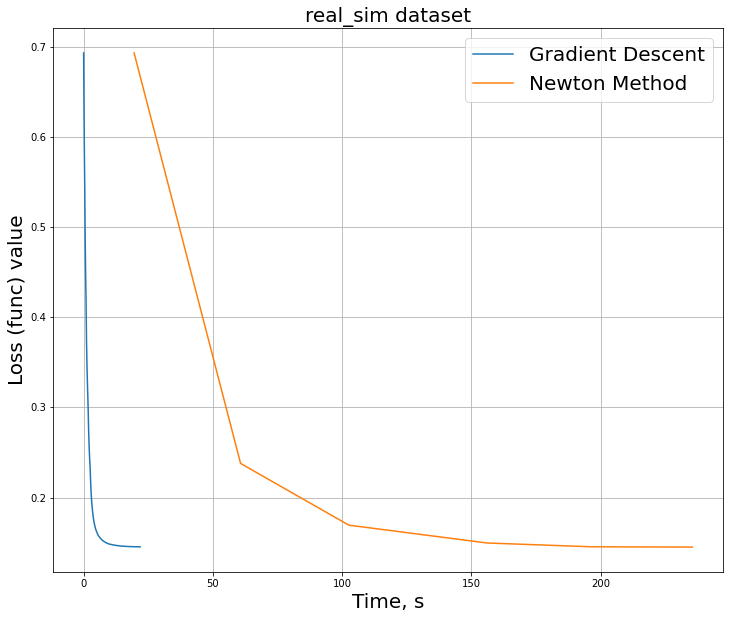

In [53]:
plt.figure(figsize=(12, 10))
plt.plot(history_GD['time'], history_GD['func'], label='Gradient Descent')
plt.plot(history_NW['time'], history_NW['func'], label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Time, s', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)

Text(0.5, 1.0, 'real_sim dataset')

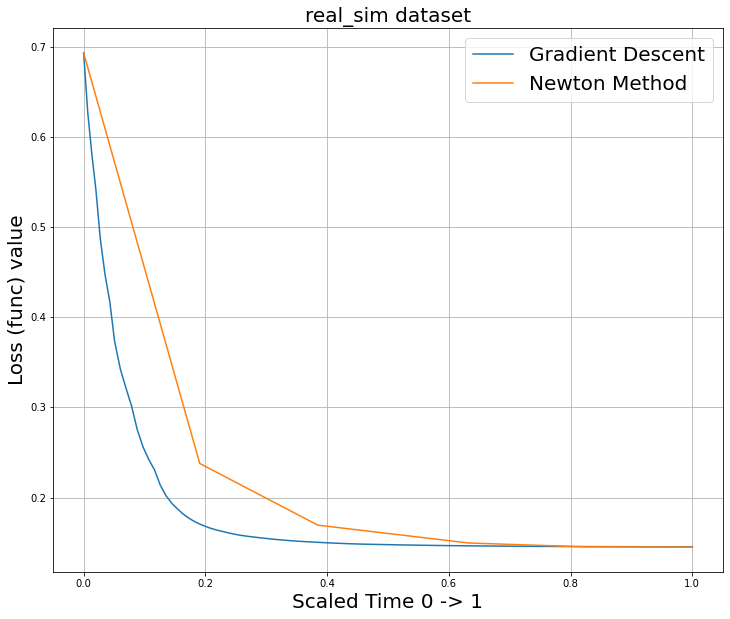

In [54]:
plt.figure(figsize=(12, 10))
def scale(time):
    time = time - np.min(time)
    time = time / np.max(time)
    return time
plt.plot(scale(np.copy(history_GD['time'])), history_GD['func'], label='Gradient Descent')
plt.plot(scale(np.copy(history_NW['time'])), history_NW['func'], label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Scaled Time 0 -> 1', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)

Text(0.5, 1.0, 'real_sim dataset')

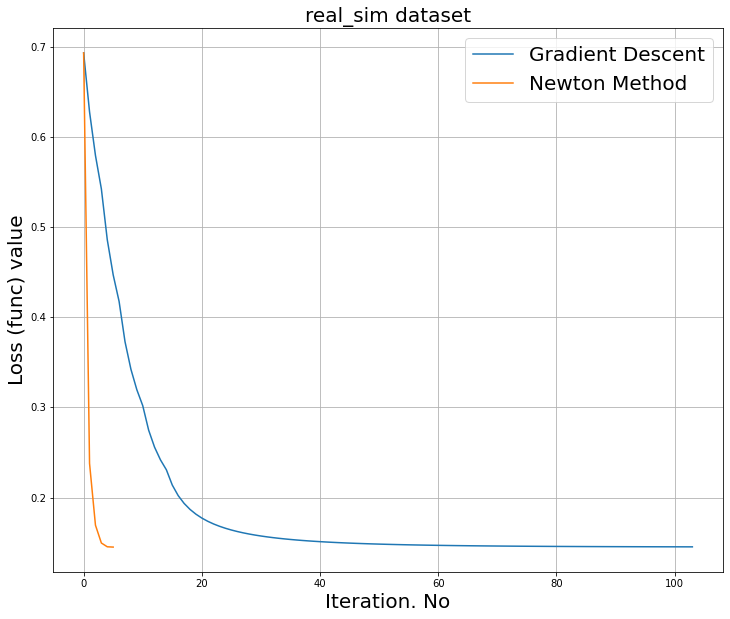

In [56]:
plt.figure(figsize=(12, 10))
def scale(time):
    time = time - np.min(time)
    time = time / np.max(time)
    return time
plt.plot(history_GD['func'], label='Gradient Descent')
plt.plot(history_NW['func'], label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Iteration. No', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)

In [57]:
len(history_GD['time']), len(history_NW['time'])

(104, 6)

In [58]:
history_NW['time'][-1] / history_GD['time'][-1]

10.758299721678727

In [59]:
scaled_grad = lambda grad: np.array(grad) ** 2 / (np.linalg.norm(w8a_oracle.grad(np.zeros(w8a_train[0].shape[1]))) ** 2)

Text(0.5, 1.0, 'real_sim dataset')

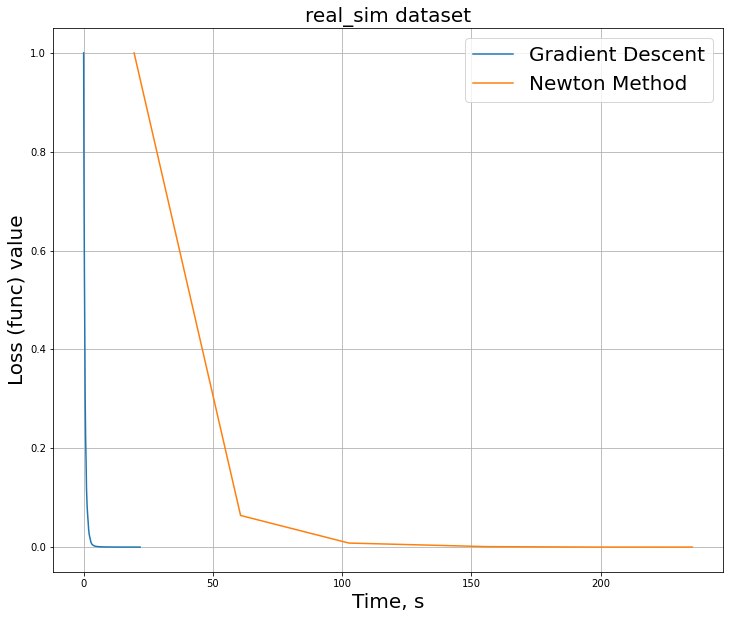

In [60]:
plt.figure(figsize=(12, 10))
plt.plot(history_GD['time'], scaled_grad(history_GD['grad_norm']), label='Gradient Descent')
plt.plot(history_NW['time'], scaled_grad(history_NW['grad_norm']), label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Time, s', fontsize=20)
plt.ylabel('Loss (func) value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)

Text(0.5, 1.0, 'real_sim dataset')

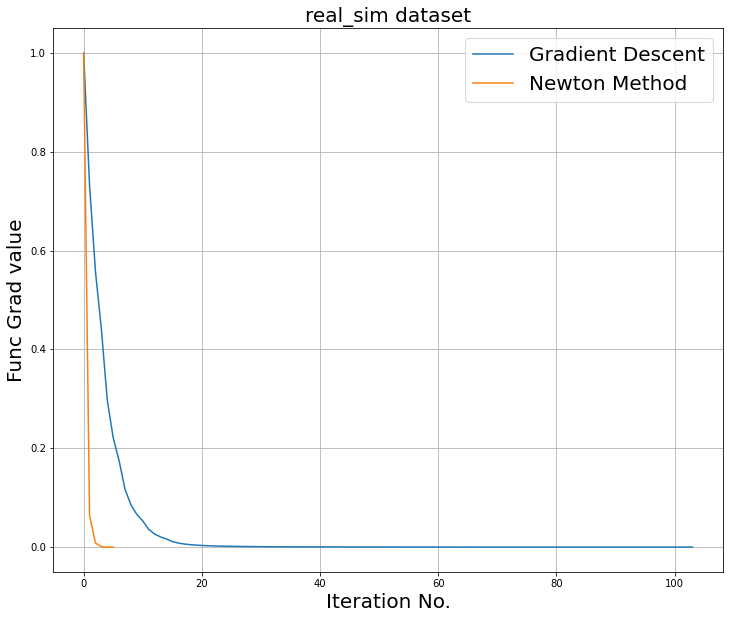

In [61]:
plt.figure(figsize=(12, 10))
def scale(time):
    time = time - np.min(time)
    time = time / np.max(time)
    return time
plt.plot(scaled_grad(history_GD['grad_norm']), label='Gradient Descent')
plt.plot(scaled_grad(history_NW['grad_norm']), label='Newton Method')
plt.legend(fontsize=20)
plt.xlabel('Iteration No.', fontsize=20)
plt.ylabel('Func Grad value', fontsize=20)
plt.grid()
plt.title('{} dataset'.format(data_name), fontsize=20)